## Chap.1 인공지능

### 1.1 알고리즘

#### 비지도 학습

k-mean clustering 알고리즘은 n개의 관측값을 k개의 클러스터로 분류하는 알고리즘이다.

In [8]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision = 4, suppress=True)

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [10]:
x, y = make_blobs(n_samples=100, centers = 4,random_state=500, cluster_std=1.25)

In [11]:
model = KMeans(n_clusters=4, random_state=0)

In [12]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [13]:
y_ = model.predict(x)

In [14]:
y_

array([1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1,
       0, 3, 0, 0, 2, 2, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 3, 3, 0, 2, 2,
       1, 0, 3, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 3, 2, 1, 0, 2, 1, 3, 1, 2,
       0, 0, 0, 3, 1, 0, 3, 2, 3, 1, 3, 2, 3, 3, 0, 1, 0, 1, 3, 3, 1, 3,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2], dtype=int32)

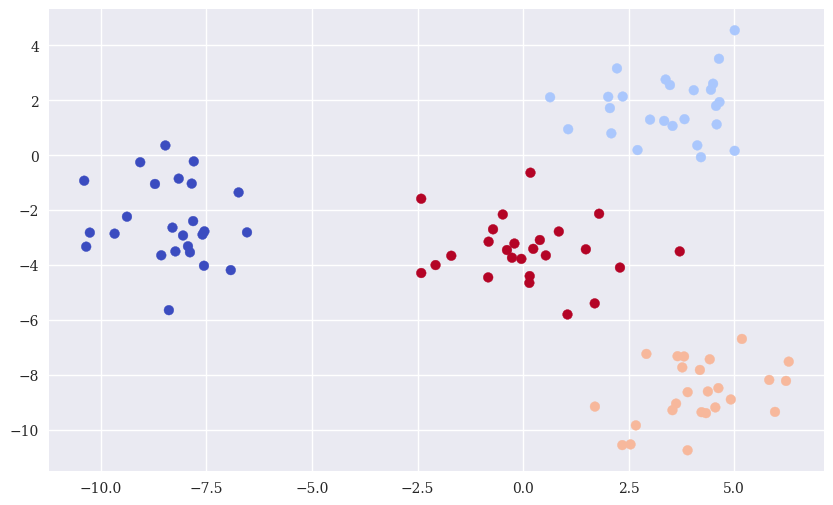

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_, cmap='coolwarm')

#### 강화 학습

이길 확률과 이겼을 때의 보수를 알려주어 이기는 쪽으로 예측이 되도록 하는 것.

In [16]:
ssp = [1,1,1,1,0]

In [17]:
asp = [1, 0]

In [18]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [19]:
rl = np.array([epoch() for _ in range(15)])
rl

array([54, 55, 53, 59, 49, 54, 50, 50, 46, 54, 45, 41, 50, 61, 50])

In [20]:
rl.mean()

np.float64(51.4)

In [21]:
def epoch():
    tr = 0
    asp = [0,1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [22]:
rl = np.array([epoch() for _ in range(15)])
rl

array([71, 71, 56, 73, 65, 59, 77, 85, 60, 71, 66, 71, 74, 71, 64])

In [23]:
rl.mean()

np.float64(68.93333333333334)

라벨 데이터의 종류와 풀어야 할 문제에 따라 두 가지 유형의 학습 작업이 있다.
- 추정 (회귀분석)
- 분류

### 1.2 신경망

#### 최소자승 회귀분석

In [24]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [25]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [26]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

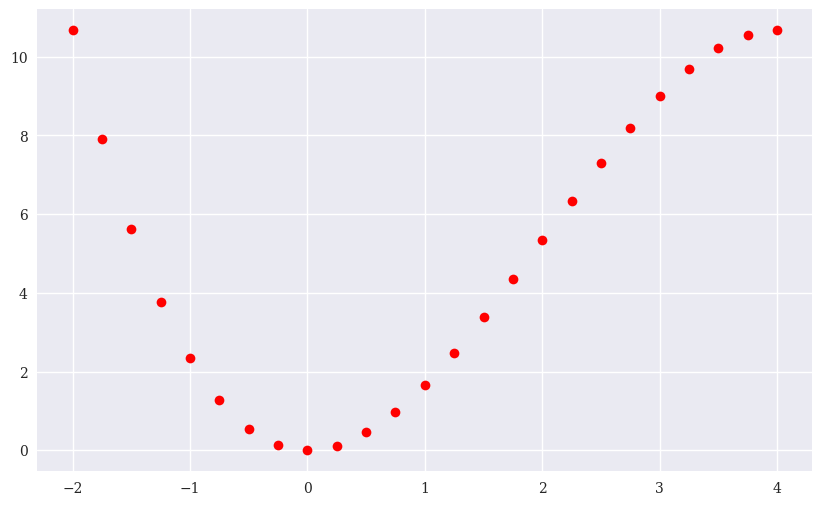

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')

In [28]:
beta = np.cov(x, y, ddof=0)[0,1]/np.var(x)
beta

np.float64(1.0541666666666667)

In [29]:
alpha = y.mean() - beta * x.mean()
alpha

np.float64(3.8625000000000003)

In [30]:
y_ = alpha + beta * x

In [31]:
MSE = ((y - y_) ** 2).mean()
MSE

np.float64(10.721953125)

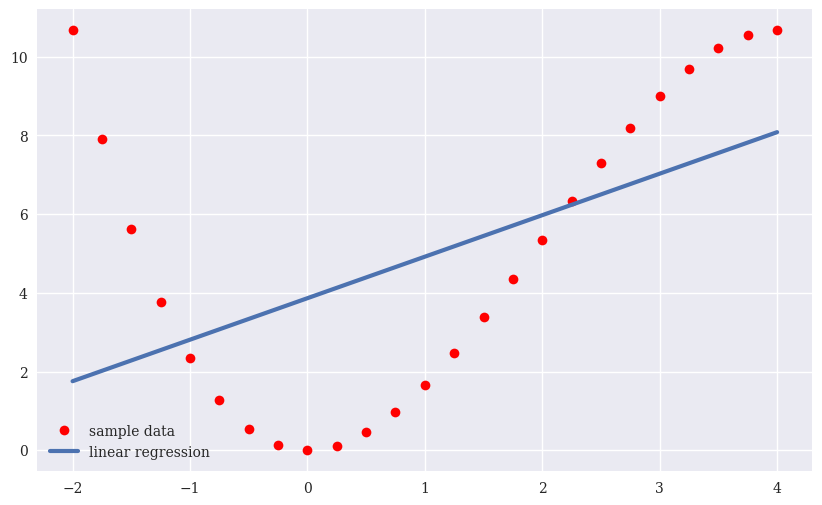

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw = 3.0,label='linear regression')
plt.legend()

여기다가 함수의 차수를 높이면 추정이 정확해지는 것을 볼 수 있다.

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


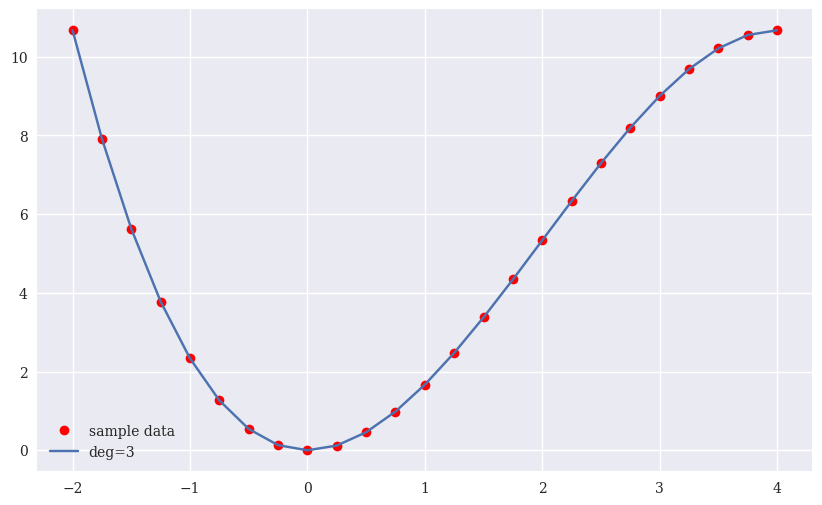

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, "ro", label="sample data")
for deg in [1,2,3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend()


#### 1.2.2 신경망을 사용한 추정

##### 사이킷런

In [34]:
from sklearn.neural_network import MLPRegressor

In [35]:
model = MLPRegressor(hidden_layer_sizes=3 * [256], learning_rate_init=0.03, max_iter=5000)

In [36]:
model.fit(x.reshape(-1, 1),y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [37]:
MSE = ((y - y_)**2).mean()
MSE

np.float64(1.038756882155994e-28)

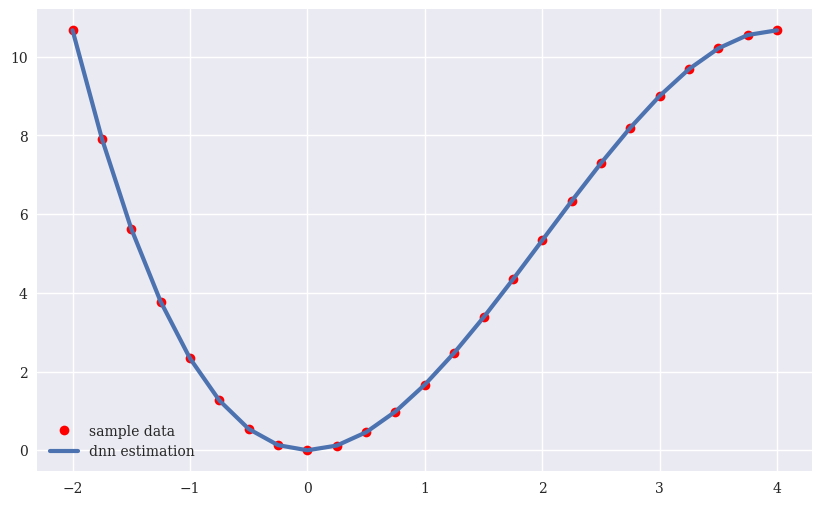

In [38]:
plt.figure(figsize=(10,6))
plt.plot(x, y,'ro',label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend()

##### 케라스

In [39]:
import tensorflow as tf
tf.random.set_seed(100)

2025-03-08 17:08:02.550334: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-08 17:08:02.553533: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-08 17:08:02.561865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741421282.578655   28866 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741421282.583543   28866 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 17:08:02.600485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [40]:
from keras.layers import Dense
from keras.models import Sequential

In [41]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

/config/anaconda3/envs/AI-Finance/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-08 17:08:03.913225: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [42]:
((y - y_) ** 2).mean()

np.float64(1.038756882155994e-28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
round=1 | MSE=3.70195
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
round=2 | MSE=0.82893
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
round=3 | MSE=0.22244
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
round=4 | MSE=0.12395
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
round=5 | MSE=0.10595


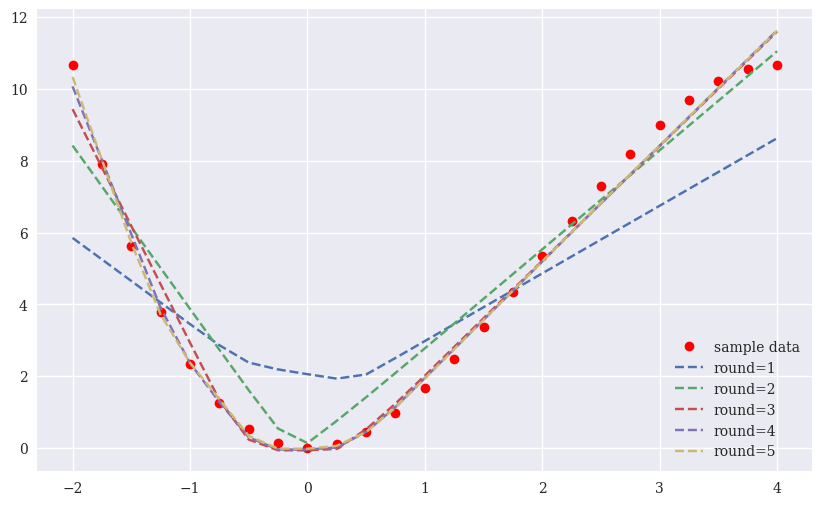

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()